In [ ]:
from itertools import chain, combinations, permutations
from random import choice, shuffle,randint
from tqdm import tqdm

N = 8

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(1, len(s)+1))


ps = tuple(powerset(range(1, N+1)))

per = [[''.join(map(str, p)) for p in permutations(i)] for i in ps if 3 <= len(i) <= N]
perstand = [[''.join(map(str, p)) for p in permutations(i)] for i in ps if len(i) >= 2]

Starter = ''


def conc_or(a, b):
    for i in range(len(b),-1,-1):
        if a[len(a)-i:]==b[:i]:
            return a[:len(a)-i]+b
    return a + b

def assemble_sps(p):
    s = Starter
    for k,v in enumerate(p):
        c = 0
        for i in per[k]:
            if i in s:
                break
        else:
            s = conc_or(s, per[k][v])
    return s

def check_sups(s):
    c = 0
    for i in perstand:
        if not any(j in s for j in i):
            c+=1
    return c


def gready_random_sampling(maxlen):
    s = '1234'
    p = []

    candidates  = list(range(0, len(per)))
    shuffle(candidates)

    while len(candidates) != 0:
        #print(len(candidates))

        temp_s = s[-N:]
        new_candidates = []

        for k in candidates:
            if not set(per[k][0]).issubset(set(temp_s)):
                new_candidates.append(k)
                continue

            if not any(i in temp_s for i in per[k]):
                new_candidates.append(k)
            

        if len(new_candidates) == 0:break
        candidates = new_candidates
        
        c = False

        min_d = 1000
        min_k = -1
        min_j = -1

        for k in candidates: 
            if c:break

            for j in range(len(per[k])):
                t = conc_or(temp_s, per[k][j])
                d = len(t) - len(temp_s)

                if d == 1:
                    #p.append((k, j))
                    s = conc_or(s, per[k][j])
                    candidates.remove(k)
                    c = True
                    break
                elif d < min_d:
                    min_k = k
                    min_j = j
        
        if not c: 
            
            #p.append((min_k, min_j))
            s = conc_or(s, per[min_k][min_j])
            candidates.remove(min_k)
            
        
        if len(s) >= maxlen:
            s = '1'
            break

    
    return s





In [ ]:
min_l = 300
checkr = True

for i in tqdm(range(100000)):
    out = gready_random_sampling(min_l)
    if checkr:
        score = check_sups(out)
    else: 
        score =  0 if len(out) > 2 else 1

    if score == 0 and len(out) < min_l:
        min_l = len(out)
        print(min_l, out)
 

In [ ]:

min_l = 1000000
checkr = False

terms = []

for i in tqdm(range(100)):
    out = gready_random_sampling(min_l)
    if checkr:
        score = check_sups(out)
    else: 
        score =  0 if len(out) > 2 else 1

    if score == 0 :
        terms.append(len(out))

print(terms)

100%|██████████| 100/100 [00:59<00:00,  1.69it/s]

[121, 121, 130, 119, 122, 121, 126, 127, 131, 131, 135, 134, 108, 134, 117, 119, 127, 132, 122, 137, 144, 125, 125, 136, 134, 128, 137, 124, 134, 112, 140, 125, 132, 133, 133, 126, 127, 135, 133, 120, 132, 132, 125, 128, 132, 135, 133, 139, 134, 119, 128, 118, 129, 128, 134, 131, 139, 143, 141, 131, 124, 121, 126, 132, 143, 126, 141, 138, 134, 137, 129, 127, 137, 142, 124, 125, 122, 127, 125, 126, 126, 128, 137, 126, 127, 132, 125, 143, 130, 134, 106, 129, 135, 141, 134, 118, 120, 122, 133, 133]


In [ ]:
def less_gready_random_sampling(iters = 10):
    s = '1234'
    p = []

    candidates  = list(range(0, len(per)))
    shuffle(candidates)

    while len(candidates) != 0:
        #print(len(candidates))

        temp_s = s[-N:]
        new_candidates = []

        for k in candidates:
            if not set(per[k][0]).issubset(set(temp_s)):
                new_candidates.append(k)
                continue

            if not any(i in temp_s for i in per[k]):
                new_candidates.append(k)
            

        if len(new_candidates) == 0:break
        candidates = new_candidates
        
        c = False

        min_d = 1000
        min_k = -1
        min_j = -1

        for k in candidates[:iters]: 
            if c:break

            for j in range(len(per[k])):
                t = conc_or(temp_s, per[k][j])
                d = len(t) - len(temp_s)

                if d == 1:
                    #p.append((k, j))
                    s = conc_or(s, per[k][j])
                    candidates.remove(k)
                    c = True
                    break
                elif d < min_d:
                    min_k = k
                    min_j = j
        
        if not c: 
            
            #p.append((min_k, min_j))
            s = conc_or(s, per[min_k][min_j])
            candidates.remove(min_k)
            
    return s

In [ ]:
def a_bit_gready_random_sampling(iters = 10):
    s = '1234'
    p = []

    candidates  = list(range(0, len(per)))
    shuffle(candidates)

    while len(candidates) != 0:
        
        temp_s = s[-N:]
        new_candidates = []

        for k in candidates:
            if not set(per[k][0]).issubset(set(temp_s)):
                new_candidates.append(k)
                continue

            if not any(i in temp_s for i in per[k]):
                new_candidates.append(k)
            
        candidates = new_candidates
        if len(candidates) == 0: break

        for j in range(len(per[0])):
            t = conc_or(s, per[0][j])
            d = len(t) - len(s)

            if d == 1:
                s = conc_or(s, per[0][j])
                break
        else:
            s = conc_or(s, choice(per[candidates[0]]))

        candidates = candidates[1:]

    return s

In [ ]:
min_l = 1000000
checkr = False

terms = []
score = 0

for i in tqdm(range(10_000)):
    out = a_bit_gready_random_sampling(20)
    
    #score = check_sups(out)
    
    if score == 0 :
        terms.append(len(out))

print(terms)

100%|██████████| 10000/10000 [03:04<00:00, 54.16it/s]

[167, 166, 177, 182, 214, 179, 210, 214, 187, 196, 214, 202, 200, 186, 180, 204, 171, 221, 213, 201, 171, 204, 181, 209, 188, 215, 194, 186, 181, 198, 189, 200, 195, 182, 205, 190, 196, 189, 192, 193, 165, 204, 167, 195, 213, 212, 215, 216, 198, 178, 198, 190, 236, 195, 192, 192, 206, 191, 193, 191, 201, 214, 183, 211, 195, 185, 210, 209, 196, 198, 179, 198, 203, 211, 173, 165, 178, 214, 176, 179, 183, 220, 216, 189, 212, 155, 200, 177, 139, 195, 216, 206, 160, 206, 212, 202, 213, 201, 170, 184, 170, 196, 203, 184, 182, 197, 164, 165, 171, 210, 189, 182, 201, 197, 191, 205, 206, 183, 185, 218, 182, 156, 182, 206, 207, 180, 195, 205, 205, 198, 200, 211, 181, 213, 209, 187, 176, 173, 185, 204, 198, 190, 203, 203, 174, 204, 213, 168, 173, 179, 201, 193, 175, 187, 186, 187, 191, 176, 196, 194, 171, 210, 188, 183, 201, 199, 178, 181, 177, 174, 190, 163, 189, 200, 199, 180, 202, 220, 206, 201, 181, 184, 191, 209, 191, 175, 204, 211, 209, 187, 169, 163, 176, 175, 180, 184, 189, 176, 214, 195,

(array([  2.,   4.,  16.,  30.,  47., 119., 261., 386., 516., 514., 720.,
        819., 755., 744., 523., 763., 778., 800., 768., 495., 570., 298.,
         15.,   8.,   3.,   7.,   5.,   5.,   5.,   4.,   7.,   2.,   4.,
          4.,   1.,   0.,   0.,   0.,   1.,   1.]),
 array([138. , 141.8, 145.6, 149.4, 153.2, 157. , 160.8, 164.6, 168.4,
        172.2, 176. , 179.8, 183.6, 187.4, 191.2, 195. , 198.8, 202.6,
        206.4, 210.2, 214. , 217.8, 221.6, 225.4, 229.2, 233. , 236.8,
        240.6, 244.4, 248.2, 252. , 255.8, 259.6, 263.4, 267.2, 271. ,
        274.8, 278.6, 282.4, 286.2, 290. ]),
 <a list of 40 Patch objects>)

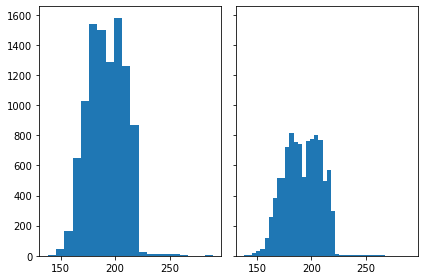

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

# Create a random number generator with a fixed seed for reproducibility
rng = np.random.default_rng(19680801)

n_bins = 20


fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(terms, bins=n_bins)
axs[1].hist(terms, bins=n_bins*2)

In [ ]:
import numpy as np

m = np.mean(terms)
st = np.std(terms)
print(m, st, min(terms))

191.6778 16.67501085936678 138
